In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pymerlin.trajectory import *

plt.rcParams.update({'font.size': 16})

## Analyse Noise data

In [22]:
df = pd.read_csv('../data/noisedata.csv')

In [23]:
df.dtypes

Run Num             int64
Series              int64
Sequence           object
Smoothing           int64
Num segs            int64
Spokes per seg      int64
Spoke per int       int64
Bandwidth         float64
Laeq [dBA]        float64
Lcpeak [dBC]      float64
dtype: object

In [24]:
def xy_stats(x,y,bw,s):
    r, p = pearsonr(x,y)
    diff = max(y)-min(y)
    print("BW: {}, S: {} \t r={:.2}, p={:.3} \t Diff: {:.2f} dBA".format(bw,s,r,p,diff))

BW: 31.25, S: 9 	 r=-0.77, p=0.0421 	 Diff: 0.30 dBA
BW: 31.25, S: 10 	 r=-0.89, p=0.00691 	 Diff: 0.20 dBA
BW: 31.25, S: 11 	 r=-0.92, p=0.00348 	 Diff: 0.20 dBA
BW: 25.0, S: 10 	 r=-0.61, p=0.144 	 Diff: 0.10 dBA
BW: 15.6, S: 10 	 r=nan, p=nan 	 Diff: 0.00 dBA


/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


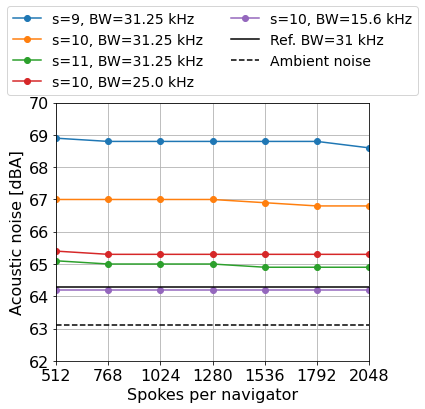

In [26]:
plt.figure(figsize=(6,6.5))
sps = 256
for s in [9,10,11]:
    bw = 31.25
    filt = (df['Smoothing']==s) & (df['Bandwidth']==bw)
    x = df[filt]['Num segs'].values*sps
    y = df[filt]['Laeq [dBA]'].values
    plt.plot(x,y,'-o', label='s={}, BW={} kHz'.format(s, bw))
    xy_stats(x,y,bw,s)

bw = 25.0
s = 10
filt = (df['Smoothing']==s) & (df['Bandwidth']==bw)
x = df[filt]['Num segs'].values*sps
y = df[filt]['Laeq [dBA]'].values
plt.plot(x,y,'-o', label='s={}, BW={} kHz'.format(s, bw))
xy_stats(x,y,bw,s)

bw = 15.6
s = 10
filt = (df['Smoothing']==s) & (df['Bandwidth']==bw)
x = df[filt]['Num segs'].values*sps
y = df[filt]['Laeq [dBA]'].values
plt.plot(x,y,'-o', label='s={}, BW={} kHz'.format(s, bw))
xy_stats(x,y,bw,s)

ref_level = df[(df['Sequence']=='ZTE NEX=1') & (df['Bandwidth']==31.25)]['Laeq [dBA]'].values[0]
plt.plot([2*sps,8*sps],[ref_level]*2, '-k', label='Ref. BW=31 kHz')

bg_level = df[df['Run Num']==215]['Laeq [dBA]'].values
plt.plot([2*sps,8*sps],[bg_level]*2, '--k', label='Ambient noise')

plt.axis([2*sps,8*sps,62,70])
plt.xticks(np.array(range(2,9))*sps)

plt.legend(bbox_to_anchor=(0.5,1.4), loc='upper center', fontsize=14, ncol=2)
plt.grid()
plt.xlabel('Spokes per navigator')
plt.ylabel('Acoustic noise [dBA]')

plt.tight_layout()
plt.savefig('figure4A.png', dpi=300)
plt.show()

# Add reference scan 31 kHz here

In [27]:
# Comparison at 1024 spokes, n=4
n=4
s=10
bw=31.25
filt = (df['Smoothing']==s) & (df['Bandwidth']==bw) & (df['Num segs']==n)
Laeq_31 = df[filt]['Laeq [dBA]'].values[0]

bw=25
filt = (df['Smoothing']==s) & (df['Bandwidth']==bw) & (df['Num segs']==n)
Laeq_25 = df[filt]['Laeq [dBA]'].values[0]

bw=15.6
filt = (df['Smoothing']==s) & (df['Bandwidth']==bw) & (df['Num segs']==n)
Laeq_15 = df[filt]['Laeq [dBA]'].values[0]

print("31 kHz: {} dBA (+{} dBA)".format(Laeq_31, Laeq_31-bg_level))
print("25 kHz: {} dBA (+{} dBA)".format(Laeq_25, Laeq_25-bg_level))
print("15 kHz: {} dBA (+{} dBA)".format(Laeq_15, Laeq_15-bg_level))

31 kHz: 67.0 dBA (+[3.9] dBA)
25 kHz: 65.3 dBA (+[2.2] dBA)
15 kHz: 64.2 dBA (+[1.1] dBA)


## Trajectory comparison

In [31]:
def plot_traj(traj, labels=False):
    ax = plt.gca()
    ax.plot(traj[:,0], traj[:,1], traj[:,2], '-k')
    ax.set_xticks([-1,0,1]); ax.set_yticks([-1,0,1]); ax.set_zticks([-1,0,1])
    if labels:
        ax.set_xlabel(r'k$_x$', fontsize=14); ax.set_ylabel(r'k$_y$', fontsize=14); ax.set_zlabel(r'k$_z$', fontsize=14)
    else:
        ax.set_xticklabels([]); ax.set_yticklabels([]); ax.set_zticklabels([])


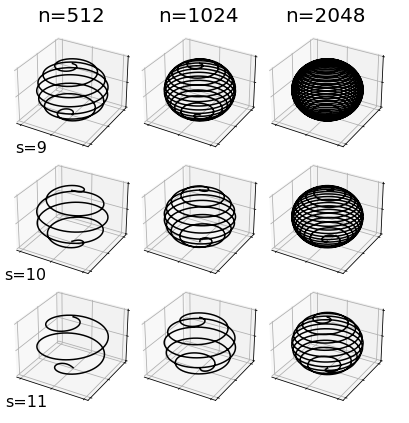

In [44]:
sps = 256
nlist = [2, 4, 8]
slist = [9,10,11]
fig = plt.figure(figsize=(16,7))
for (i,s) in enumerate(slist):
    for (j,n) in enumerate(nlist):
        ax = fig.add_subplot(3,7,(j+1)+i*7, projection='3d')
        traj = linear_phyllotaxis(sps*n, nint=1, sf=s)
        plot_traj(traj)
        if i==0: plt.title('n={}'.format(n*sps), fontsize=20)
        if j==0: ax.text(-0.25,-1,-2,s='s={}'.format(s), horizontalalignment='right', fontsize=16)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Figure4B.png', dpi=200)